# Ensemble Classifiers for Predicting Heart Disease

## Data Exploration

In [1]:
import pandas as pd

df_heart = pd.read_csv('./EP_Dataset6/heart_dataset.csv')
df_heart.columns
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Figure size 1440x720 with 0 Axes>

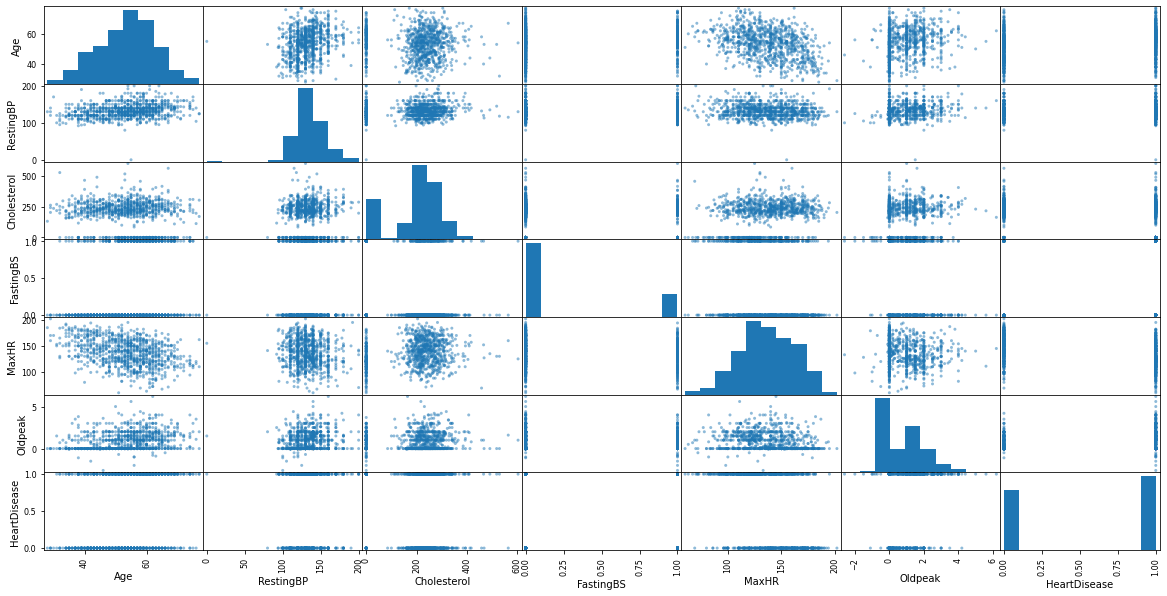

In [2]:
#Scatter matrix for checking outlier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
scatter_matrix(df_heart, figsize=(20,10))
plt.show()

## Outlier Removal

<Axes: >

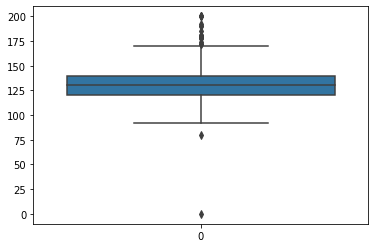

In [3]:
# Box Plot
import seaborn as sns

sns.boxplot(df_heart['RestingBP'])

In [4]:
import numpy as np
undr = np.where(df_heart['RestingBP']<85)[0]
print(undr)

[314 449]


In [5]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        df = df[(df[col] >= mean-(n_std*sd))]
        
    return df

In [6]:
df_heart = remove_outliers(df_heart, ['RestingBP'], 3)
df_heart.info()

Working on column: RestingBP
<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             910 non-null    int64  
 1   Sex             910 non-null    object 
 2   ChestPainType   910 non-null    object 
 3   RestingBP       910 non-null    int64  
 4   Cholesterol     910 non-null    int64  
 5   FastingBS       910 non-null    int64  
 6   RestingECG      910 non-null    object 
 7   MaxHR           910 non-null    int64  
 8   ExerciseAngina  910 non-null    object 
 9   Oldpeak         910 non-null    float64
 10  ST_Slope        910 non-null    object 
 11  HeartDisease    910 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 92.4+ KB


<Axes: >

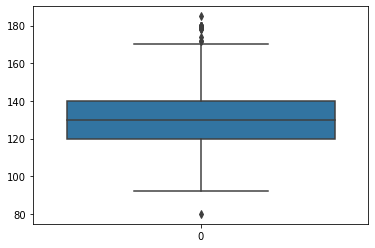

In [7]:
sns.boxplot(df_heart['RestingBP'])

Working on column: Cholesterol
<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             907 non-null    int64  
 1   Sex             907 non-null    object 
 2   ChestPainType   907 non-null    object 
 3   RestingBP       907 non-null    int64  
 4   Cholesterol     907 non-null    int64  
 5   FastingBS       907 non-null    int64  
 6   RestingECG      907 non-null    object 
 7   MaxHR           907 non-null    int64  
 8   ExerciseAngina  907 non-null    object 
 9   Oldpeak         907 non-null    float64
 10  ST_Slope        907 non-null    object 
 11  HeartDisease    907 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 124.4+ KB


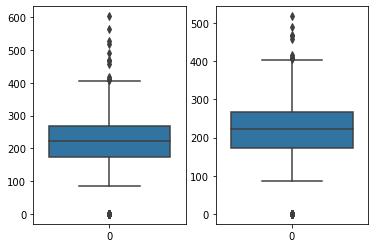

In [8]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(df_heart['Cholesterol'], ax=axes[0])
df_heart = remove_outliers(df_heart, ['Cholesterol'], 3)
sns.boxplot(df_heart['Cholesterol'], ax=axes[1])
df_heart.info()

Working on column: MaxHR
<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             906 non-null    int64  
 1   Sex             906 non-null    object 
 2   ChestPainType   906 non-null    object 
 3   RestingBP       906 non-null    int64  
 4   Cholesterol     906 non-null    int64  
 5   FastingBS       906 non-null    int64  
 6   RestingECG      906 non-null    object 
 7   MaxHR           906 non-null    int64  
 8   ExerciseAngina  906 non-null    object 
 9   Oldpeak         906 non-null    float64
 10  ST_Slope        906 non-null    object 
 11  HeartDisease    906 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 124.3+ KB


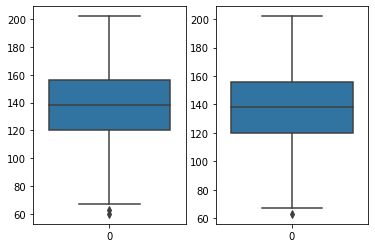

In [9]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(df_heart['MaxHR'], ax=axes[0])
df_heart = remove_outliers(df_heart, ['MaxHR'], 3)
sns.boxplot(df_heart['MaxHR'], ax=axes[1])
df_heart.info()

Working on column: Oldpeak
<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    object 
 2   ChestPainType   899 non-null    object 
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    object 
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    object 
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    object 
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 123.6+ KB


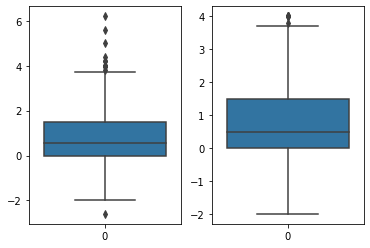

In [10]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(df_heart['Oldpeak'], ax=axes[0])
df_heart = remove_outliers(df_heart, ['Oldpeak'], 3)
sns.boxplot(df_heart['Oldpeak'], ax=axes[1])
df_heart.info()

<Figure size 1440x720 with 0 Axes>

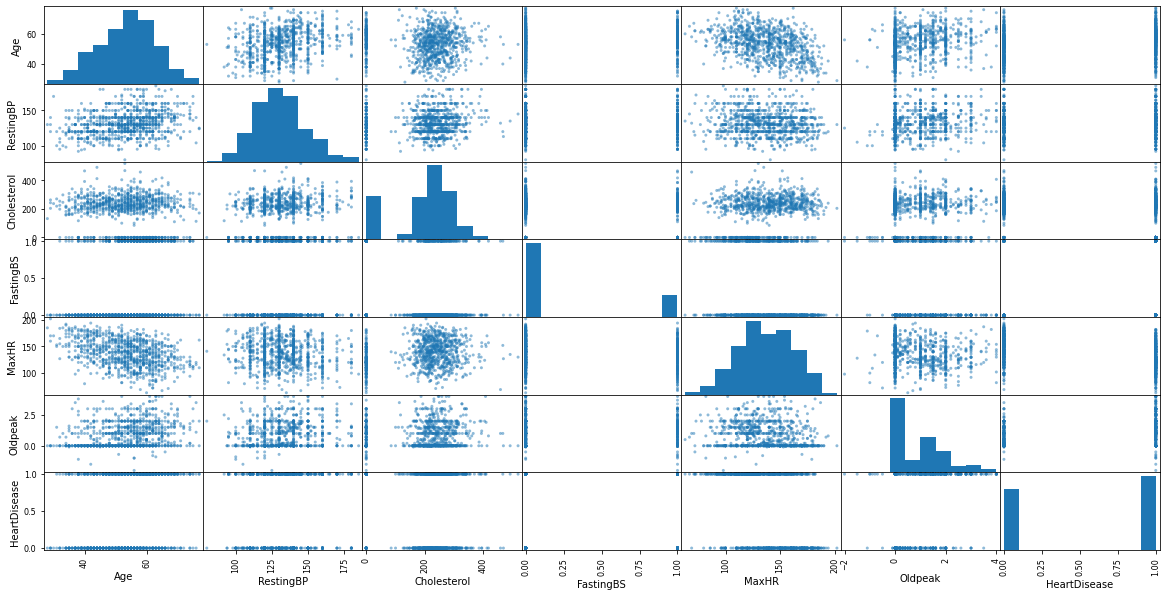

In [11]:
plt.figure(figsize=(20,10))
scatter_matrix(df_heart, figsize=(20,10))
plt.show()

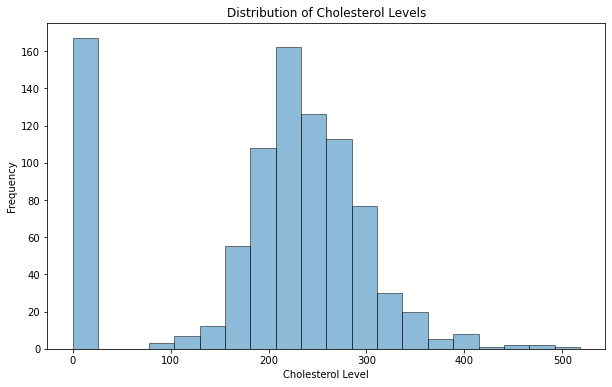

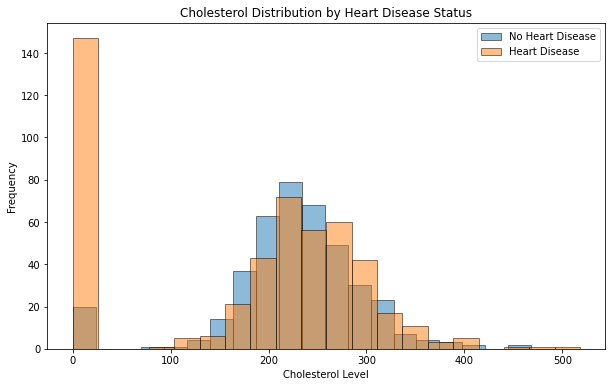

T-Test p-value: 3.7782058350431994e-13


In [12]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.figure(figsize=(10, 6))
plt.hist(df_heart['Cholesterol'], bins=20, edgecolor='k', alpha=0.5)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

# Step 2: Group by Heart Disease Status and visualize cholesterol distributions
plt.figure(figsize=(10, 6))
plt.hist(df_heart[df_heart['HeartDisease'] == 0]['Cholesterol'], bins=20, edgecolor='k', alpha=0.5, label='No Heart Disease')
plt.hist(df_heart[df_heart['HeartDisease'] == 1]['Cholesterol'], bins=20, edgecolor='k', alpha=0.5, label='Heart Disease')
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Statistical Comparison (t-test)
cholesterol_no_heart_disease = df_heart[df_heart['HeartDisease'] == 0]['Cholesterol']
cholesterol_heart_disease = df_heart[df_heart['HeartDisease'] == 1]['Cholesterol']

t_statistic, p_value = ttest_ind(cholesterol_no_heart_disease, cholesterol_heart_disease)
print("T-Test p-value:", p_value)

## Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.array(df_heart['Sex']))
le.classes_
df_heart['Sex'] = le.transform(df_heart['Sex'])
df_heart.head

<bound method NDFrame.head of      Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  

In [14]:
#There are four types of chest pain, we will use the OneHotEncoder to encode their values.

df_heart = pd.get_dummies(df_heart, columns = ['ChestPainType'])
df_heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,N,1.2,Flat,1,0,0,0,1
914,68,1,144,193,1,Normal,141,N,3.4,Flat,1,1,0,0,0
915,57,1,130,131,0,Normal,115,Y,1.2,Flat,1,1,0,0,0
916,57,0,130,236,0,LVH,174,N,0.0,Flat,1,0,1,0,0


In [15]:
df_heart = pd.get_dummies(df_heart, columns = ['ST_Slope'])
df_heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,Normal,172,N,0.0,0,0,1,0,0,0,0,1
1,49,0,160,180,0,Normal,156,N,1.0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,0,0,1,0,0,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,1,1,0,0,0,0,1,0
4,54,1,150,195,0,Normal,122,N,0.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,N,1.2,1,0,0,0,1,0,1,0
914,68,1,144,193,1,Normal,141,N,3.4,1,1,0,0,0,0,1,0
915,57,1,130,131,0,Normal,115,Y,1.2,1,1,0,0,0,0,1,0
916,57,0,130,236,0,LVH,174,N,0.0,1,0,1,0,0,0,1,0


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.array(df_heart['ExerciseAngina']))
le.classes_
df_heart['ExerciseAngina'] = le.transform(df_heart['ExerciseAngina'])
df_heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,Normal,172,0,0.0,0,0,1,0,0,0,0,1
1,49,0,160,180,0,Normal,156,0,1.0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,ST,98,0,0.0,0,0,1,0,0,0,0,1
3,48,0,138,214,0,Normal,108,1,1.5,1,1,0,0,0,0,1,0
4,54,1,150,195,0,Normal,122,0,0.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,0,1.2,1,0,0,0,1,0,1,0
914,68,1,144,193,1,Normal,141,0,3.4,1,1,0,0,0,0,1,0
915,57,1,130,131,0,Normal,115,1,1.2,1,1,0,0,0,0,1,0
916,57,0,130,236,0,LVH,174,0,0.0,1,0,1,0,0,0,1,0


In [17]:
#There are four types of chest pain, we will use the OneHotEncoder to encode their values.

df_heart = pd.get_dummies(df_heart, columns = ['RestingECG'])
df_heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,1,0,1,0
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,0,1,0,1,0,0


In [18]:
#Now we will reset the indices as the final step, and create a correlation matrix
df_heart=df_heart.reset_index(drop=True)
df_heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,1,0,1,0
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
895,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
896,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
897,57,0,130,236,0,174,0,0.0,1,0,1,0,0,0,1,0,1,0,0


In [19]:
X = df_heart.loc[:, df_heart.columns != 'HeartDisease']
y = df_heart.loc[:, df_heart.columns == 'HeartDisease']

## Scaling/Normalization

In [20]:
import matplotlib.pyplot as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

numerical = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
stdsc = StandardScaler()
X[numerical] = stdsc.fit_transform(X[numerical])

/tmp/ipykernel_8727/2512238340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical] = stdsc.fit_transform(X[numerical])


In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

def kfold_eval_docs(_clf, _X, _y):
    accs = []
    _niter = 10
    for i in range(_niter):
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
        for train_index, test_index in kf.split(_X, _y):
            _clf.fit(_X[train_index], _y[train_index])
            ypred = _clf.predict(_X[test_index])
            accs += [accuracy_score(_y[test_index], ypred)]

    return np.array(accs)



In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

svm_lin = SVC(kernel='linear', probability=True, random_state=1)
rf = RandomForestClassifier(random_state=1)
nn = MLPClassifier(random_state=1)
dt = DecisionTreeClassifier(random_state=1)
gnb = GaussianNB()

In [23]:
X = X.convert_dtypes()
X_arr = X.values
y = y.convert_dtypes()
y_arr = y.values.ravel()
y_arr = y_arr.astype(int)

print(X_arr[0:10],y_arr[0:10])

[[-1.4281544575402327 1 0.4659002194880051 0.8496358403840663 0
  1.3843199804890185 0 -0.8554686228349684 0 1 0 0 0 0 1 0 1 0]
 [-0.47585532156215293 0 1.634713662545678 -0.16812203985498125 0
  0.7529728039978795 0 0.13751561464551787 0 0 1 0 0 1 0 0 1 0]
 [-1.7455875028662593 1 -0.11850650204083138 0.7936124708296233 0
  -1.5356607107824998 0 -0.8554686228349684 0 1 0 0 0 0 1 0 0 1]
 [-0.5816663366708285 0 0.3490188751822378 0.14934372095352896 0
  -1.1410687254755378 1 0.634007733385761 1 0 0 0 0 1 0 0 1 0]
 [0.05319975398122473 1 1.0503069410168415 -0.028063615968873808 0
  -0.5886399460457912 0 -0.8554686228349684 0 0 1 0 0 0 1 0 1 0]
 [-1.5339654726489083 1 -0.7029132235696678 1.3164972533377577 0
  1.3054015834276262 0 -0.8554686228349684 0 0 1 0 0 0 1 0 1 0]
 [-0.8990993819968551 0 -0.11850650204083138 0.36409997091222707 0
  1.3054015834276262 0 -0.8554686228349684 0 1 0 0 0 0 1 0 1 0]
 [0.05319975398122473 1 -1.2873199450985042 0.09332035139908598 0
  0.20054402456813272 0 -

## Weak Learners

***1. The normal 10 CV performance of each of the 4 classifiers.***

***Generate an ensemble of 100 classifiers for each of the four classifiers in Q1.
stored as a list. In order to create weak ensemble members, set the neural network hidden
sizes to (3, 3), max iterations to 30, and tolerance to 1e-1. Set the decision tree parameters
to max depth of 5 and max features of 5. We will evaluate these four ensemble classifiers.
For each of the ensemble, report the first classifier performance in the ensemble.***


In [24]:
acc = kfold_eval_docs(rf, X_arr, y_arr)
print(f'Random Forest CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Random Forest CV accuracy=0.867 0.033


In [25]:
acc = kfold_eval_docs(svm_lin, X_arr, y_arr)
print(f'Support Vector Classification CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Support Vector Classification CV accuracy=0.866 0.036


In [26]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    acc = kfold_eval_docs(nn, X_arr, y_arr)
    
print(f'Neural Network Machine CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Neural Network Machine CV accuracy=0.869 0.035
CPU times: user 1min 55s, sys: 1min 7s, total: 3min 3s
Wall time: 46.4 s


In [27]:
acc = kfold_eval_docs(dt, X_arr, y_arr)
print(f'Decision Tree Classification CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Decision Tree Classification CV accuracy=0.791 0.044


In [28]:
acc = kfold_eval_docs(gnb, X_arr, y_arr)
print(f'Gaussian Naive Bayes Classification CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Gaussian Naive Bayes Classification CV accuracy=0.857 0.036


## Ensemble Learners

In [40]:
svm_ens, nn_ens, dt_ens, gnb_ens = [], [], [], []

for i in range(100):
    svm_lin = SVC(kernel='linear', probability=True, random_state=1)
    nn = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol= 0.1,random_state=1)
    dt = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=1)
    gnb = GaussianNB()
    svm_ens += [svm_lin]
    nn_ens += [nn]
    dt_ens += [dt]
    gnb_ens += [gnb]

print(svm_ens[0])

SVC(kernel='linear', probability=True, random_state=1)


In [41]:
def rows_randomsubset(_train_index, _n, n_estimators=1):
    import random
    _train_index = _train_index.tolist()
    subset_index = []
    for i in range(n_estimators):
        subset_index += [random.sample(_train_index, _n)]
    
    # returns a list of list of row indices and values selected from the training dataset - subset rows
    return subset_index

In [42]:
# Let's build a single weak learner using GaussianNB by subset of rows
def weak_fit(_list_ind, _X, _y, _clf):
    _Xs = _X[_list_ind,:]
    _ys = _y[_list_ind]
    return _clf.fit(_Xs, _ys)  # return a single classifier of whatever type

def weak_predict(_clf,_X):
    X_test = _X
    return _clf.predict(X_test), _clf.predict_proba(X_test)

# Generate numerous trained NB classifiers as weak learners
def ensemble_fit(_subset_rowsIndx, _X, _y, _clf):
    # the list of ensemble columns have a column list for every member of the ensemble
    n_estimators = len(_subset_rowsIndx)
    # list of weak learners
    ensemble_clf = []
    for j in range(n_estimators):
        #call weak_fit to fit data on a subset of rows [j], of classifier type _clf
        #do this for all subset of rows and return a list of fit classifiers.
        ensemble_clf += [weak_fit(_subset_rowsIndx[j], _X, _y, _clf[j])]

    return ensemble_clf

# Using trained ensemble, predict the outcome by majority voting
def ensemble_predict(_ensemble_clf, subset_indx, _Xtest):
    from collections import defaultdict
    n_estimators = len(_ensemble_clf)
    assert n_estimators==len(subset_indx)  # Error check
    # weak learner predictions
    ypred_e, yprob_e = [], []
    for j in range(n_estimators):
        #predict using a fit classifier and the same list of rows on the test dataset.
        res = weak_predict(_ensemble_clf[j], _Xtest)
        ypred_e += [res[0]]  #value of the prediction
        yprob_e += [res[1]]  # score/probability of the prediction
    # majority voting for each data point in _Xtest
    ypred = []
    for i in range(_Xtest.shape[0]): #go through all the voting categories (based on test data)
        ypred_scores = defaultdict(float)
        for j in range(n_estimators):  #go through all the estimators
            for c, p in enumerate(yprob_e[j][i]):   #go through the predictions and probabilities of each estimator
                ypred_scores[c] += p
        ix = max(ypred_scores.items(), key=lambda a: a[1]) #this function goes through sum probability predictions of each of the 100 classifiers in a voting category, 
        ypred += [ix[0]]  #finds the maximum summed probability, and stores its key (score) into ypred. This is called soft-voting.
    return np.array(ypred)  #return as an np array

In [43]:
%%time

# Attemp 10-fold CV using ensemble_fit, ensemble_predict
# _nfeatures: feature subset size
def eval_ensemble(_X, _y, _clf, _n_estimators, _ratio):
    accuracies = []
    accuracy_1 = []
    _niter = 10
    count = 0
    for i in range(_niter):
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
        for train_index, test_index in kf.split(_X, _y):
            count += 1
            _nsamples = round(_ratio*_X[train_index].shape[0])
            subset_indx = rows_randomsubset(train_index, _nsamples, n_estimators=_n_estimators)
            #100 items in rows, corresponding to each of the classifiers in the ensemble
            #162 datapoints per list item, corresponding to 162 datapoints of each classifier
            #Why 162? because ratio*training fold samples.
            e_clf = ensemble_fit(subset_indx, _X, _y, _clf)
            y_pred = ensemble_predict(e_clf, subset_indx, _X[test_index])
            
            accuracies += [accuracy_score(_y[test_index], y_pred)]
            if(count%50 ==0):
                print(y_pred)  #error check
                
            y_pred1, y_prob1 = weak_predict(e_clf[0], _X[test_index])
            accuracy_1 += [accuracy_score(_y[test_index], y_pred1)]

    return np.array(accuracies), np.array(accuracy_1)



# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(X_arr, y_arr, dt_ens, 100, 0.2)

print(f'Ensemble Decision Tree learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Decision Tree Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0]
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]
Ensemble Decision Tree learners average Acc= 0.86 ±0.032
Classifier1 in Decision Tree Ensemble learners average Acc= 0.79 ±0.046
CPU times: user 11.6 s, sys: 9.92 ms, total: 11.7 s
Wall time: 11.7 s


In [44]:
acc, acc1 = eval_ensemble(X_arr, y_arr, nn_ens, 100, 0.2)
print(f'Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ensemble learners average Acc= 0.45 ±0.005
Classifier1 in Ensemble learners average Acc= 0.45 ±0.005


In [45]:
acc, acc1 = eval_ensemble(X_arr, y_arr, svm_ens, 100, 0.2)

print(f'Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0]
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0]
Ensemble learners average Acc= 0.86 ±0.038
Classifier1 in Ensemble learners average Acc= 0.84 ±0.042


In [46]:
acc, acc1 = eval_ensemble(X_arr, y_arr, gnb_ens, 100, 0.2)

print(f'Ensemble learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1]
[0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0]
Ensemble learners average Acc= 0.86 ±0.036
Classifier1 in Ensemble learners average Acc= 0.84 ±0.050



***Ensemble classifiers are created in eval_ensemble, there we perform stratified 10-fold CV, and in each fold, we subpartition the fold with replacement using the rows_random subset function. We do the partitioning using indeces, the number of indeces partitions subsampled is equal to the number of estimators or classifiers we will use. The size is equal to the fold size times the ratio of subsampling. We have to do this to ensure that the items we train on are in the fold, otherwise, we would risk subsampling data not in train_index. Then we fit exercise ensemble fit, this is where the number of estimators is iterated through, and on each iteration we fit the classifier type we assigned in the first cell to different subsamples using weak_fit, so we will have in total 100 classifiers of the same type, fit on different portions of the training fold. Then the fit classifiers are returned and used for a prediction under ensemble_predict. In ensemble_predict we loop through all the classifiers, and cause each classifier to do a prediction on the testing fold. This prediction will consist of ~90 datapoints, each with a prediction score (0,1) and a prediction probability using predict_proba. Using our voting scheme, we employ soft voting, summing up the probabilities of each score in the ensemble prediction, then we compute the argmax of those summed up probabilities, and we store the prediction score with the highest sum into ypred, this occurs across all 100 classifiers and their votes are tallied across the ~90 datapoints.Then accuracy is determined for the ensemble, and one classifier.***

-------------------------------------------------------------------------------------------------------------------------------------------------------
***Improvements before getting data for plotting***

## Feature Selection

In [47]:
# Direct correlation between each column of X and the target y
corrs = np.array([np.correlate(X_arr[:,j], y_arr)[0] for j in range(X.shape[1])])

# Reverse sort, numpy array negation reverses the order
ranks = np.argsort((-corrs))

# Display top-9 and bot-5
rankings = [(f'{corrs[j]:.1f}', X.columns[j]) for j in ranks]
display(rankings[:9])
display(rankings[-5:])

[('445.0', 'Sex'),
 ('379.0', 'ChestPainType_ASY'),
 ('371.0', 'ST_Slope_Flat'),
 ('308.0', 'ExerciseAngina'),
 ('277.0', 'RestingECG_Normal'),
 ('187.8', 'Oldpeak'),
 ('165.0', 'FastingBS'),
 ('128.3', 'Age'),
 ('113.0', 'RestingECG_ST')]

[('44.0', 'ST_Slope_Down'),
 ('23.0', 'ChestPainType_ATA'),
 ('20.0', 'ChestPainType_TA'),
 ('-107.0', 'Cholesterol'),
 ('-181.7', 'MaxHR')]

In [48]:
# Find columns with correlation=100.0 or less and then delete them from X
delcols = [(j, f'{corrs[j]:.1f}', X.columns[j]) for j in ranks if abs(corrs[j])<=150]

print(delcols)

[(0, '128.3', 'Age'), (17, '113.0', 'RestingECG_ST'), (15, '102.0', 'RestingECG_LVH'), (14, '77.0', 'ST_Slope_Up'), (10, '70.0', 'ChestPainType_NAP'), (2, '49.3', 'RestingBP'), (12, '44.0', 'ST_Slope_Down'), (9, '23.0', 'ChestPainType_ATA'), (11, '20.0', 'ChestPainType_TA'), (3, '-107.0', 'Cholesterol')]


In [49]:
# Column numbers to delete
dd = [d[0] for d in delcols]

# Drop those columns, axis=1
Xpp = np.delete(np.array(X_arr, copy=True), dd, axis=1)

# Xpp is new pre-processed X

# Sanity check
print(f'{X.shape}, {Xpp.shape}')

(899, 18), (899, 8)


In [50]:
Xpp[0:10]

array([[1, 0, 1.3843199804890185, 0, -0.8554686228349684, 0, 0, 1],
       [0, 0, 0.7529728039978795, 0, 0.13751561464551787, 0, 1, 1],
       [1, 0, -1.5356607107824998, 0, -0.8554686228349684, 0, 0, 0],
       [0, 0, -1.1410687254755378, 1, 0.634007733385761, 1, 1, 1],
       [1, 0, -0.5886399460457912, 0, -0.8554686228349684, 0, 0, 1],
       [1, 0, 1.3054015834276262, 0, -0.8554686228349684, 0, 0, 1],
       [0, 0, 1.3054015834276262, 0, -0.8554686228349684, 0, 0, 1],
       [1, 0, 0.20054402456813272, 0, -0.8554686228349684, 0, 0, 1],
       [1, 0, -0.2729663578002216, 1, 0.634007733385761, 1, 1, 1],
       [0, 0, -0.6675583431071835, 0, -0.8554686228349684, 0, 0, 1]],
      dtype=object)

In [51]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,-1.428154,1,0.4659,0.849636,0,1.38432,0,-0.855469,0,1,0,0,0,0,1,0,1,0
1,-0.475855,0,1.634714,-0.168122,0,0.752973,0,0.137516,0,0,1,0,0,1,0,0,1,0
2,-1.745588,1,-0.118507,0.793612,0,-1.535661,0,-0.855469,0,1,0,0,0,0,1,0,0,1
3,-0.581666,0,0.349019,0.149344,0,-1.141069,1,0.634008,1,0,0,0,0,1,0,0,1,0
4,0.0532,1,1.050307,-0.028064,0,-0.58864,0,-0.855469,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,1,-1.28732,0.616205,0,-0.194048,0,0.336112,0,0,0,1,0,1,0,0,1,0
895,1.534554,1,0.699663,-0.046738,1,0.161085,0,2.520678,1,0,0,0,0,1,0,0,1,0
896,0.370633,1,-0.118507,-0.625646,0,-0.864854,1,0.336112,1,0,0,0,0,1,0,0,1,0
897,0.370633,0,-0.118507,0.354763,0,1.463238,0,-0.855469,0,1,0,0,0,1,0,1,0,0


## Subsampling Ratios with Ensemble Learners

***5. Testing with subsample ratios of 0.05 and 0.2***

In [53]:
acc, acc1 = eval_ensemble(Xpp, y_arr, gnb_ens, 100, 0.2)

print(f'Ensemble learners Gaussian Distribution average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0]
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]
Ensemble learners Gaussian Distribution average Acc= 0.86 ±0.032
Classifier1 in Ensemble learners average Acc= 0.85 ±0.032


In [54]:
# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, dt_ens, 100, 0.2)

print(f'Ensemble Decision Tree learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Decision Tree Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0]
[0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0]
Ensemble Decision Tree learners average Acc= 0.85 ±0.035
Classifier1 in Decision Tree Ensemble learners average Acc= 0.80 ±0.048


In [55]:
# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, nn_ens, 100, 0.2)

print(f'Ensemble Neural Network learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Neural Network Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
Ensemble Neural Network learners average Acc= 0.56 ±0.047
Classifier1 in Neural Network Ensemble learners average Acc= 0.56 ±0.049


The neural net was significantly helped after data reduction.

In [56]:
# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, svm_ens, 100, 0.2)

print(f'Ensemble SVM learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in SVM Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

[0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0]
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]
Ensemble SVM learners average Acc= 0.86 ±0.034
Classifier1 in SVM Ensemble learners average Acc= 0.84 ±0.041


In [57]:
%%time

def eval_singleweak(_X, _y, _clf, _ratio):
    _niters = 10
    accuracies = []
    for _ in range(_niters):
        # Keep the subset features (i.e. columns) the same for a 10-fold
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
        for train_index, test_index in kf.split(_X, _y):
            _nsamples = round(_ratio*_X[train_index].shape[0])
            subset_indx = rows_randomsubset(train_index, _nsamples, n_estimators=1)
            clf = weak_fit(subset_indx[0], _X, _y, _clf)
            y_pred, y_prob = weak_predict(clf, _X[test_index])
            accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

# Measure individual decision tree weak learner performance
acc = eval_singleweak(Xpp, y_arr, dt,  0.2)
print(f'Native DT with baggin CV average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Native DT with baggin CV average Acc= 0.80 ±0.040
CPU times: user 145 ms, sys: 162 µs, total: 145 ms
Wall time: 145 ms


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
***Now we will compare the ensembles and the native DT with subsample ratios of 0.05.***

In [58]:
#Sanity check
print(DTN_dict, SVM_LIN_dict, GNB_dict, DT_dict, NN_dict)

{0.2: 0.7981161048689138} {0.2: 0.8554831460674159} {0.2: 0.8626204744069915} {0.2: 0.8548177278401999} {0.2: 0.5636317103620474}


In [59]:
subsample_ratio = 0.05

# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, nn_ens, 100, subsample_ratio)

print(f'Ensemble Neural Network learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Neural Network Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, gnb_ens, 100, subsample_ratio)
print(f'Ensemble Gaussian Naive Bayes average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Gaussian Naive Bayes Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, svm_ens, 100, subsample_ratio)
print(f'Ensemble SVM learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in SVM Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

# Measure ensemble weak learners performance
acc, acc1 = eval_ensemble(Xpp, y_arr, dt_ens, 100, subsample_ratio)
print(f'Ensemble Decision Tree learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
print(f'Classifier1 in Decision Tree Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')


# Measure individual decision tree weak learner performance
acc = eval_singleweak(Xpp, y_arr, dt,  subsample_ratio)
print("\n", "\n", f'Native DT with baggin CV average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

[0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
Ensemble Neural Network learners average Acc= 0.56 ±0.045
Classifier1 in Neural Network Ensemble learners average Acc= 0.56 ±0.048
[0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0]
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]
Ensemble Gaussian Naive Bayes average Acc= 0.86 ±0.032
Classifier1 in Gaussian Naive Bayes Ensemble learners average Acc= 0.80 ±0.072
[0 0 0 

In [72]:
DT_dict, DT1_dict, NN_dict, NN1_dict, GNB_dict,GNB1_dict, SVM_LIN_dict, SVM_LIN1_dict = {},{},{},{},{},{},{},{}

In [73]:
#0.005 and 0.01 ratio of bagging is too small, causes errors where the bagged y_train could have only 1 class label (bag size is ~4)
#Instead I decided to use a ratio of 0.4 and 0.02, I'm unsure how to circumvent this problem but you can't fit a classifier on samples that are too small.
_subsample_ratio = [0.03,0.05, 0.1, 0.2, 0.4]

for ratio in _subsample_ratio:
    # Measure ensemble weak learners performance
    acc, acc1 = eval_ensemble(Xpp, y_arr, nn_ens, 100, ratio)
    NN_dict[ratio] = np.mean(acc)

    print(f'Ensemble Neural Network learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
    print(f'Classifier1 in Neural Network Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

    # Measure ensemble weak learners performance
    acc, acc1 = eval_ensemble(Xpp, y_arr, gnb_ens, 100, ratio)
    GNB_dict[ratio] = np.mean(acc)
    print(f'Ensemble Gaussian Naive Bayes average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
    print(f'Classifier1 in Gaussian Naive Bayes Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

    # Measure ensemble weak learners performance
    acc, acc1 = eval_ensemble(Xpp, y_arr, svm_ens, 100, ratio)
    SVM_LIN_dict[ratio] = np.mean(acc)
    print(f'Ensemble SVM learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
    print(f'Classifier1 in SVM Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')

    # Measure ensemble weak learners performance
    acc, acc1 = eval_ensemble(Xpp, y_arr, dt_ens, 100, ratio)
    DT_dict[ratio] = np.mean(acc)
    print(f'Ensemble Decision Tree learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
    print(f'Classifier1 in Decision Tree Ensemble learners average Acc= {np.mean(acc1):.2f} {chr(177)}{np.std(acc1):.3f}')


    # Measure individual decision tree weak learner performance
    acc = eval_singleweak(Xpp, y_arr, dt,  ratio)
    DT1_dict[ratio] = np.mean(acc)
    
    acc = eval_singleweak(Xpp, y_arr, nn,  ratio)
    NN1_dict[ratio] = np.mean(acc)
    
    acc = eval_singleweak(Xpp, y_arr, gnb,  ratio)
    GNB1_dict[ratio] = np.mean(acc)
    
    acc = eval_singleweak(Xpp, y_arr, svm_lin,  ratio)
    SVM_LIN1_dict[ratio] = np.mean(acc)

#Sanity check
print('DTN_dict', DTN_dict, '\n', 'SVM_LIN_dict', SVM_LIN_dict, '\n', 'GNB_dict ', GNB_dict, '\n', 'DT_dict', DT_dict, '\n', 'NN_dict', NN_dict)

[0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
Ensemble Neural Network learners average Acc= 0.56 ±0.045
Classifier1 in Neural Network Ensemble learners average Acc= 0.56 ±0.047
[0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0]
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]
Ensemble Gaussian Naive Bayes average Acc= 0.86 ±0.034
Classifier1 in Gaussian Naive Bayes Ensemble learners average Acc= 0.78 ±0.087
[0 0 0 

In [74]:
DT_keys = np.fromiter(DT_dict.keys(), dtype=float)
DT_values = np.fromiter(DT_dict.values(), dtype=float)

DT1_keys = np.fromiter(DT1_dict.keys(), dtype=float)
DT1_values = np.fromiter(DT1_dict.values(), dtype=float)
#key order are not sorted because the analysis for a 0.2 bag happened first, so we will have to chop the last element, roll back the array, then append the last element back on

SVM_LIN_keys = np.fromiter(SVM_LIN_dict.keys(), dtype=float)
SVM_LIN_values = np.fromiter(SVM_LIN_dict.values(), dtype=float)

SVM_LIN1_keys = np.fromiter(SVM_LIN1_dict.keys(), dtype=float)
SVM_LIN1_values = np.fromiter(SVM_LIN1_dict.values(), dtype=float)

GNB_keys = np.fromiter(GNB_dict.keys(), dtype=float)
GNB_values = np.fromiter(GNB_dict.values(), dtype=float)

GNB1_keys = np.fromiter(GNB1_dict.keys(), dtype=float)
GNB1_values = np.fromiter(GNB1_dict.values(), dtype=float)

NN_keys = np.fromiter(NN_dict.keys(), dtype=float)
NN_values = np.fromiter(NN_dict.values(), dtype=float)

NN1_keys = np.fromiter(NN1_dict.keys(), dtype=float)
NN1_values = np.fromiter(NN1_dict.values(), dtype=float)

print(GNB_keys, GNB_values)

[0.03 0.05 0.1  0.2  0.4 ] [0.85516604 0.8602834  0.86195381 0.86195256 0.86217478]


## Visualization

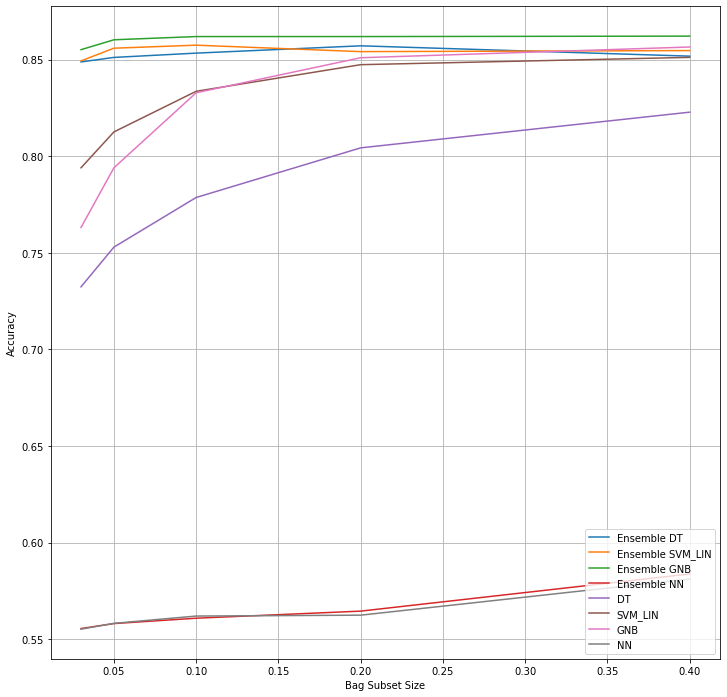

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
# Plot
plt.plot(DT_keys, DT_values, label='Ensemble DT')
plt.plot(SVM_LIN_keys, SVM_LIN_values, label='Ensemble SVM_LIN')
plt.plot(GNB_keys, GNB_values, label='Ensemble GNB')
plt.plot(NN_keys, NN_values, label='Ensemble NN')
plt.plot(DT1_keys, DT1_values, label='DT')
plt.plot(SVM_LIN1_keys, SVM_LIN1_values, label='SVM_LIN')
plt.plot(GNB1_keys, GNB1_values, label='GNB')
plt.plot(NN1_keys, NN1_values, label='NN')

plt.xlabel('Bag Subset Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

***As you can see utilizing the ensemble method improved the overall accuracy of our classifiers. In comparison to non-ensemble classifiers, all ensemble classifiers had an improved accuracy, especially in cases with with a small bag subset size. Methods such as NN and Ensemble NN had low performance all throughout, this is likely because these methods rely on data, otherwise their accuracy is stifled. The Gaussian Naive Bayes classifier enjoyed the largest accuracy boost, and noteably the decision tree. Typically support vector machine classifiers work best depending on the data distribution, here we had data with good seperation, so even a weak learner with a small subset was able to perform quite well. In terms of decision trees they tend to work best with larger subset sizes because they rely on information content, I noticed this as well before and after my dataset's reduction, decision tree ensemble before the reduction and after the reduction was not helped at all, while all the other classifiers were.***